In [87]:
import pandas as pd
import numpy as np

a = pd.read_csv('listings.csv')
b = pd.read_csv('listings (1).csv')
c = pd.read_csv('listings (2).csv')
d = pd.read_csv('listings (3).csv')
e = pd.read_csv('listings (4).csv')
f = pd.read_csv('listings (5).csv')
g = pd.read_csv('listings (6).csv')
h = pd.read_csv('listings (7).csv')

inputDF = pd.concat([a,b,c,d,e,f,g,h])

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

inputDF.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,Guests solely occupy the 1 floor apartment wit...,2,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",6,122,6,32,1.0,Real Bed,1.0,...,This is a totally separate apartment located o...,0.0,MA,"Boston, MA, United States",Fully separate apartment in a two apartment bu...,0.0,Local subway stop ( Maverick Station on the Bl...,$750.00,0.0,02128
1,You get full access to the guest room with pri...,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",23,341,47,73,1.0,Real Bed,1.0,...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,225.0,MA,"Boston, MA, United States",This is a private guest room with private bath...,0.0,"Excellent Access to all of Boston, Walk to Mus...",$980.00,0.0,02119
2,"Full Private apartment. 1 bedroom, kitchen, ...",4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0,250,6,26,1.0,Real Bed,1.0,...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,0.0,MA,"Boston, MA, United States",0,0.0,"We are a 5 minute walk to the subway, 5 minut...",0,0.0,02119
3,"You can have access to your room, the adjacent...",2,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",17,99,47,77,1.0,Real Bed,1.0,...,"This is a well-maintained, two-family house bu...",0.0,MA,"Boston, MA, United States",Come stay with me in Boston's Roslindale neigh...,0.0,"PUBLIC TRANSPORTATION: From the house, quick p...",$395.00,0.0,02131
4,Guests have access to the full unit,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0,254,0,0,1.0,Real Bed,1.0,...,Fully Furnished studio with enclosed bedroom. ...,0.0,MA,"Boston, MA, United States","Bright, 1 bed with curved glass windows facing...",0.0,The MBTA site is a great reference for public ...,"$1,200.00",0.0,02108


Text(0,0.5,'Number of listings')

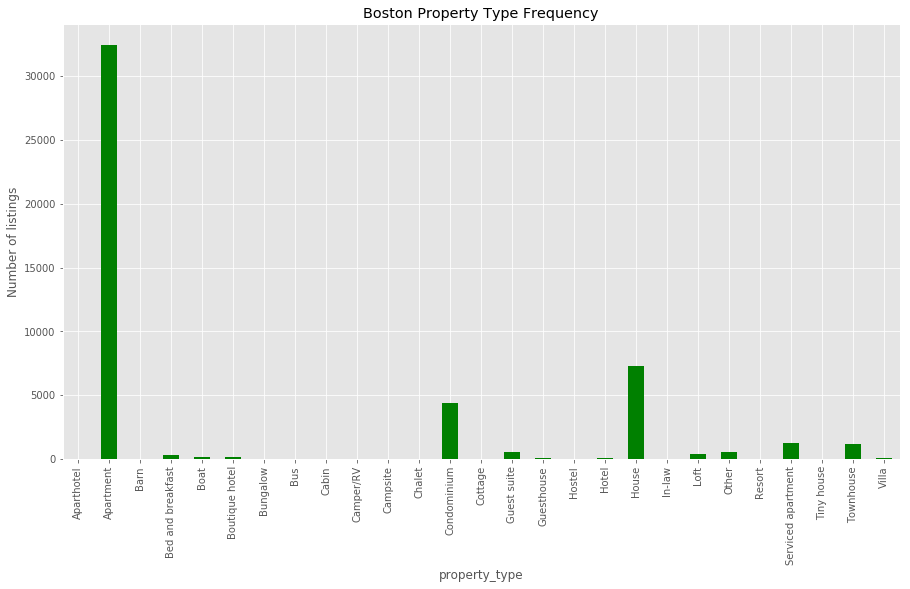

In [88]:
# Analyzing and plotting the number of listings based on their property type

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = 'Green', 
           figsize =(15,8), 
           title = 'Boston Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

In [89]:
# Categorizing differernt listings based on room_type

roomType_DF=inputDF.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,number_Of_Listings
0,Entire home/apt,31415
1,Private room,16786
2,Shared room,718


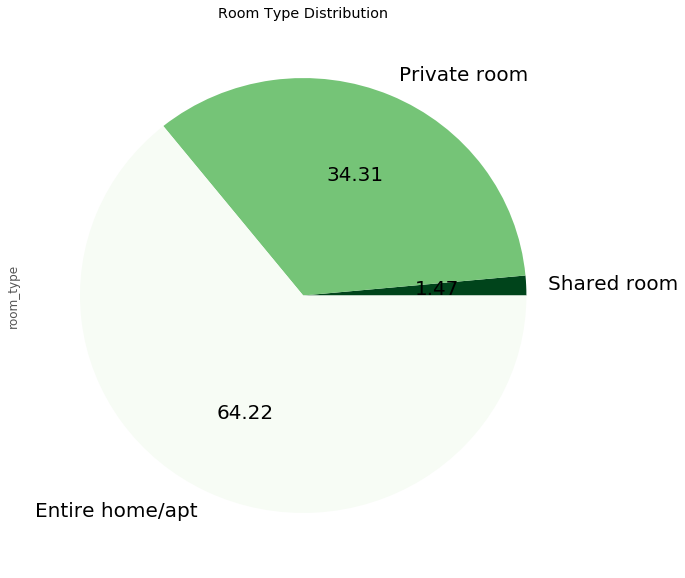

In [90]:
%matplotlib inline

from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Greens_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

People are more inclined towards listing their entire property than that of private rooms or shared rooms. 
Also, Apartment, houses and condos has majority amoung all listings.

In [91]:
# analyzing the prices for different room type and property type

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
46,Tiny house,Shared room,500.000000
15,Camper/RV,Private room,437.500000
6,Boat,Entire home/apt,346.886598
47,Townhouse,Entire home/apt,326.521921
42,Serviced apartment,Entire home/apt,306.564666


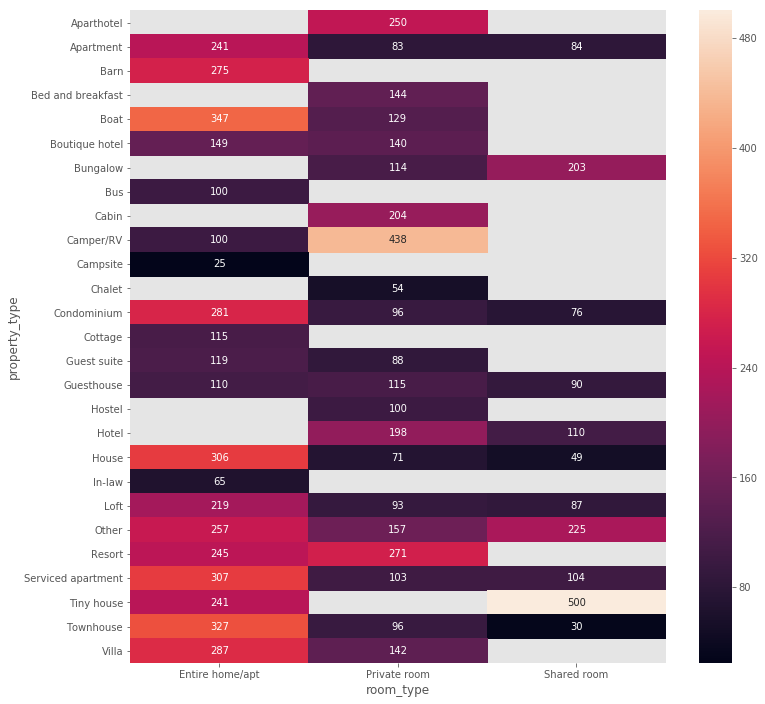

In [92]:
#Plotting the same on a heatMap

import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

All the listings prices broken down by property type and room type. This gives us a much better understanding of the price breakdown in Boston based on property and room types. It can be analyzed that for almost all property type,prices for Entire home/apartment is the maximum.

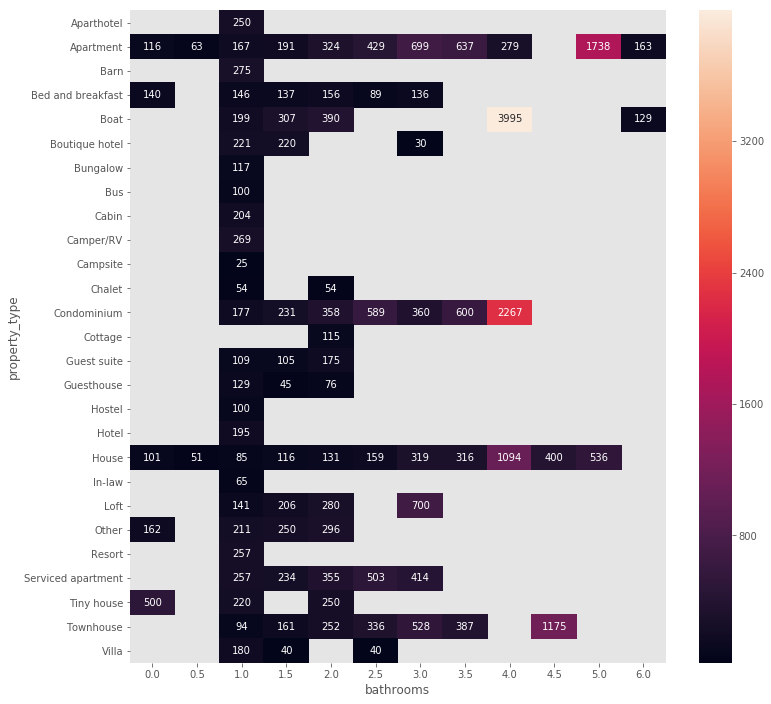

In [93]:
# HeatMap for variation of prices with number of bathrooms for listings

plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby([
        'property_type', 'bathrooms']).price.mean().unstack(),annot=True, fmt=".0f")

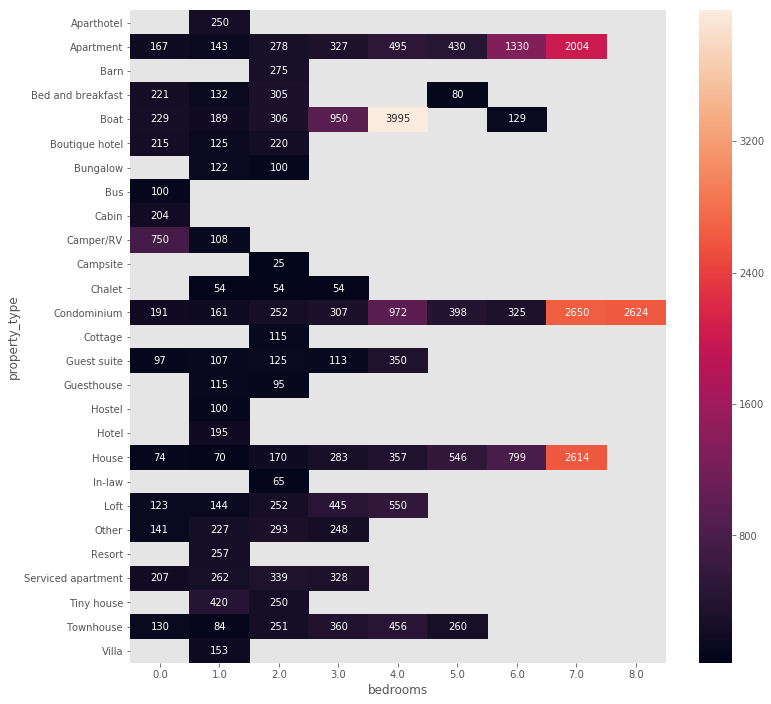

In [94]:
# HeatMap for variation of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby([
        'property_type', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

It can be seen that the property with type as Apartment and the listing as with type as entire house with maximum number of bedooms has highest price.

In [95]:
#Analyzing what amenities costs more 
import re

amenitiesDF = inputDF[['amenities','price']]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

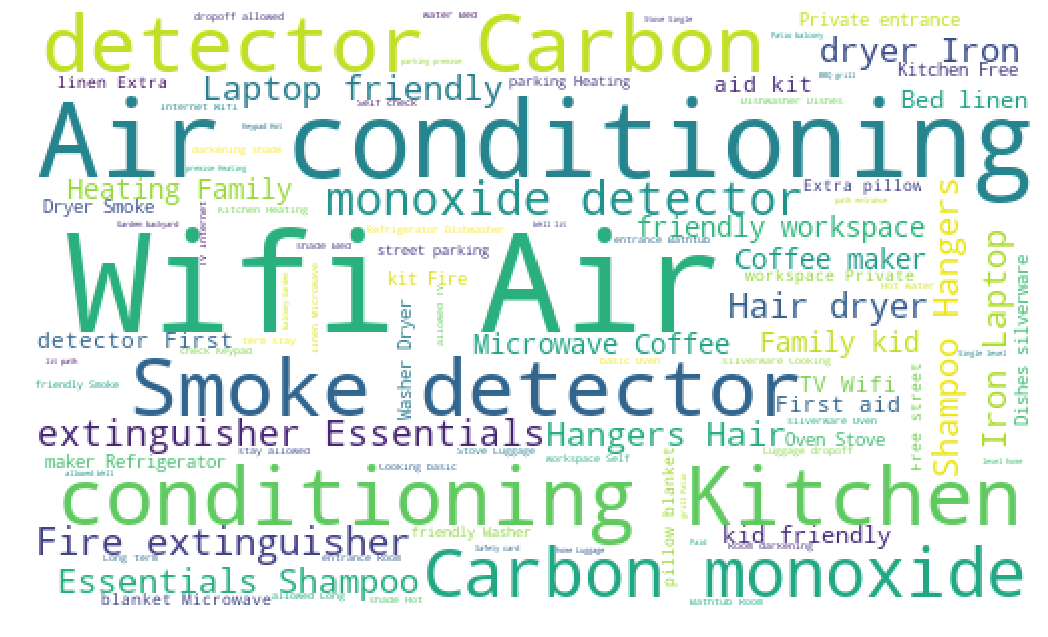

In [96]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 500, height = 300, background_color="white").generate(allemenities_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be seen that listings with higher prices have extra eminities such as Air conditioning, Wifi, smoke detector, washer/dryer, Kid friendly, Heating, hair dryer, buzzer and Extra emenities comes with extra prices.

In [97]:
#checking average prices for each listings based on room type

avgPrice_DF=inputDF.groupby('room_type').price.mean()
avgPrice_DF=avgPrice_DF.reset_index()
avgPrice_DF=avgPrice_DF.rename(columns={'price':'average_Price'})
avgPrice_DF

,room_type,average_Price
0,Entire home/apt,250.933662
1,Private room,83.768736
2,Shared room,71.162953


In [98]:
#Analyzing data on Entire Apartments/home to find the right location to invest property.
# grouping neighbourhood by number of listings

neighbourhood_DF=home.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_cleansed,Number_Of_Listings
1,Back Bay,3433
10,Fenway,2999
8,Downtown,2904
22,South End,2805
12,Jamaica Plain,2240


In [99]:
# grouping neighbourhood by average price of listings

neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_cleansed,Average_Price
13,Leather District,903.121951
19,Roxbury,398.580678
21,South Boston Waterfront,322.107226
16,Mission Hill,294.333333
20,South Boston,291.404517


In [100]:
#Merging above two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Average_Price
0,Back Bay,3433,288.273230
1,Fenway,2999,245.457152
2,Downtown,2904,278.257576
3,South End,2805,228.350446
4,Jamaica Plain,2240,201.404464


Text(0,0.5,'Number Of Listings')

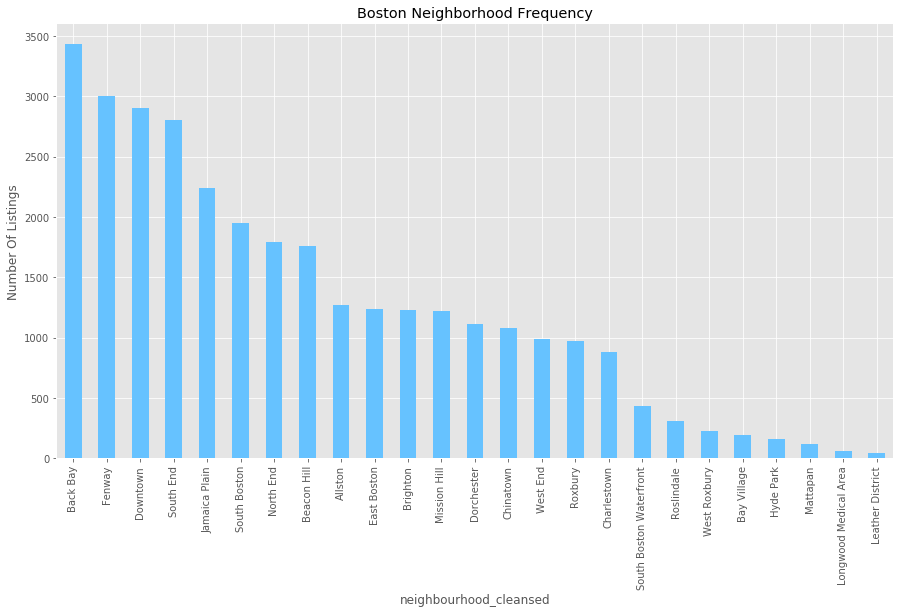

In [101]:
# visualizing the frequency of listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number Of Listings')

It can be noticed that the maximum number of listings for entire apartment for Boston on Airbnb is in Back Bay area followed by fenway, Downtown and South End. So these area become potential neighbourhood to invest a property

Text(0,0.5,'Average Price')

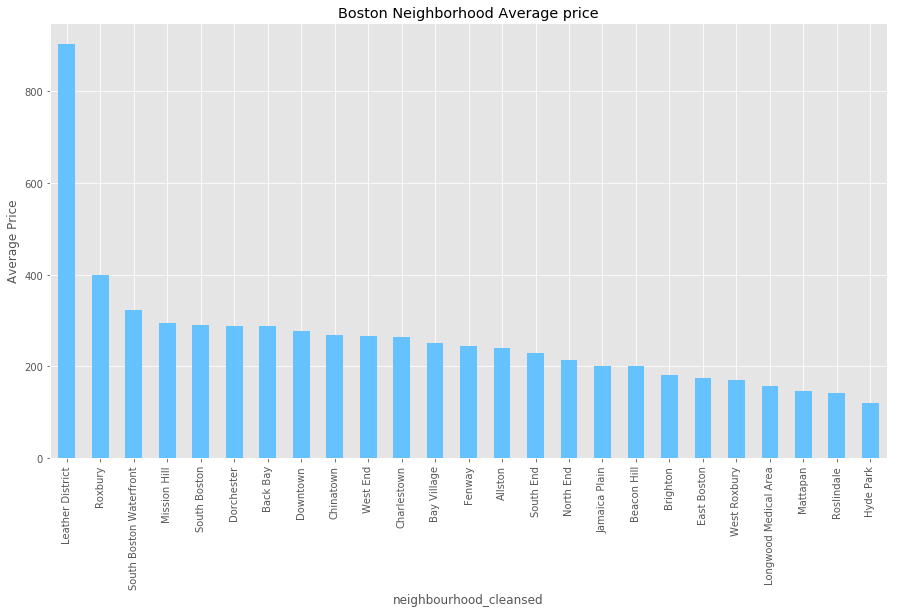

In [103]:
# Now lets visualize average price of these listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Average_Price']

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Average_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Neighborhood Average price', 
           legend = False)

plt.ylabel('Average Price')

'Back Bay' and 'Downtown' can be considered as the potential locations as the number of listings are maximum,wealthier neighbourhoods and the avergae price of houses is fairly high.(However, neighborhoods with less than 100 listings might have relatively inaccurate average prices due to presence of outliers.)